In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm
from scipy.stats import linregress
from matplotlib.lines import Line2D

# 疏散星团上的测试

## 1. 在 Melotte 22, NGC 2632, NGC_2682 三个疏散星团中 LAMOST-SpecTAE 的化学丰度随Teff 的变化

In [40]:
Melotte_22_catalog = pd.read_csv("./match_result_Jingzhong/Our_And_Melotte_22.csv")   # xsc
NGC_2168_catalog = pd.read_csv("./match_result_Jingzhong/Our_And_NGC_2168.csv")    
NGC_2632_catalog = pd.read_csv("./match_result_Jingzhong/Our_And_NGC_2632.csv")       # xsc
NGC_2281_catalog = pd.read_csv("./match_result_Jingzhong/Our_And_NGC_2281.csv")
NGC_2682_catalog = pd.read_csv("./match_result_Jingzhong/Our_And_NGC_2682.csv")    # xsc

In [41]:
Melotte_22_catalog.columns

Index(['obsid_1', 'LAMOST', 'RAdeg', 'DEdeg', 'snrg_1', 'snrr', 'snri', 'RV1d',
       'Teff', 'logg_1', '[Fe/H]', 'GaiaDR2', 'plx', 'e_plx', 'pmRA*',
       'e_pmRA*', 'pmDE', 'e_pmDE', 'Gmag', 'BP-RP', 'proba', 'Cluster',
       'obsid_2', 'ra', 'dec', 'snrg_2', 'Teff[K]', 'Teff[K]_uncertainty',
       'Logg_2', 'Logg_uncertainty', 'RV', 'RV_uncertainty', 'FeH',
       'FeH_uncertainty', 'MgH', 'MgH_uncertainty', 'SiH', 'SiH_uncertainty',
       'SH', 'SH_uncertainty', 'KH', 'KH_uncertainty', 'CaH',
       'CaH_uncertainty', 'TiH', 'TiH_uncertainty', 'CrH', 'CrH_uncertainty',
       'NiH', 'NiH_uncertainty', 'CH', 'CH_uncertainty', 'NH',
       'NH_uncertainty', 'OH', 'OH_uncertainty', 'AlH', 'AlH_uncertainty',
       'MnH', 'MnH_uncertainty', 'NaH', 'NaH_uncertainty', 'VH',
       'VH_uncertainty', 'GroupID', 'GroupSize', 'Separation'],
      dtype='object')

In [42]:
Melotte_22_catalog.shape, NGC_2168_catalog.shape, NGC_2632_catalog.shape, NGC_2281_catalog.shape

((401, 67), (265, 65), (262, 65), (181, 65))

In [43]:
# label_name_list = ['Fe', 'C', 'N', 'O', 'Mg', 'Al', 'Si', 'S', 'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Ni']
label_name_list = ['FeH', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH', 'SH', 'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH', 'NaH','VH']

sample_fraction = 0.3
# data_all = [Melotte_22_catalog.sample(frac=sample_fraction, replace=True), 
#             NGC_2168_catalog.sample(frac=sample_fraction, replace=True), 
#             NGC_2632_catalog.sample(frac=sample_fraction, replace=True),
#             NGC_2281_catalog.sample(frac=sample_fraction, replace=True),
#             NGC_2682_catalog.sample(frac=sample_fraction, replace=True), ]

# data_all_all = [Melotte_22_catalog, NGC_2168_catalog, NGC_2632_catalog,NGC_2281_catalog, NGC_2682_catalog]
# star_cluster_name = ['Melotte_22', 'NGC_2168', 'NGC_2632','NGC_2281','NGC_2682']

data_all = [Melotte_22_catalog.sample(frac=sample_fraction, replace=True), 
            # NGC_2168_catalog.sample(frac=sample_fraction, replace=True), 
            NGC_2632_catalog.sample(frac=sample_fraction, replace=True),
            # NGC_2281_catalog.sample(frac=sample_fraction, replace=True),
            NGC_2682_catalog.sample(frac=sample_fraction, replace=True), ]

data_all_all = [Melotte_22_catalog, NGC_2632_catalog, NGC_2682_catalog]
star_cluster_name = ['Melotte_22', 'NGC_2632', 'NGC_2682']


Teff_all = [df["Teff[K]"] for df in data_all_all]
Teff = [df["Teff[K]"] for df in data_all]
Metallic_element = []
Metallic_element_all = []
Metallic_element_mean = []
Metallic_element_std = []
for ele in label_name_list:
    Metallic_element.append([df[ele] for df in data_all])
    Metallic_element_all.append([df[ele] for df in data_all_all])
    Metallic_element_mean.append([df[ele].mean() for df in data_all])
    Metallic_element_std.append([df[ele].std() for df in data_all])

len(Metallic_element[0]), len(Teff)

(3, 3)

In [44]:
SpecTAE_Metallic_element_std = []
for index in range(len(data_all_all)):
    SpecTAE_Metallic_element_std.append([data_all_all[index][ele].std() for ele in label_name_list])

    
for index in range(len(SpecTAE_Metallic_element_std)):
    max_value = max(SpecTAE_Metallic_element_std[index])
    min_value = min(SpecTAE_Metallic_element_std[index])
    average_value = sum(SpecTAE_Metallic_element_std[index]) / len(SpecTAE_Metallic_element_std[index])
    
    gap = (max_value - min_value) / 2
    # print("最大值:", max_value)
    # print("最小值:", min_value)
    # print("平均值:", average_value, "\n")

    print(f'在 {star_cluster_name[index]} 中的整体化学均匀性为：{average_value:.3f} ± {gap:.3f}dex')

在 Melotte_22 中的整体化学均匀性为：0.121 ± 0.042dex
在 NGC_2632 中的整体化学均匀性为：0.141 ± 0.048dex
在 NGC_2682 中的整体化学均匀性为：0.085 ± 0.037dex


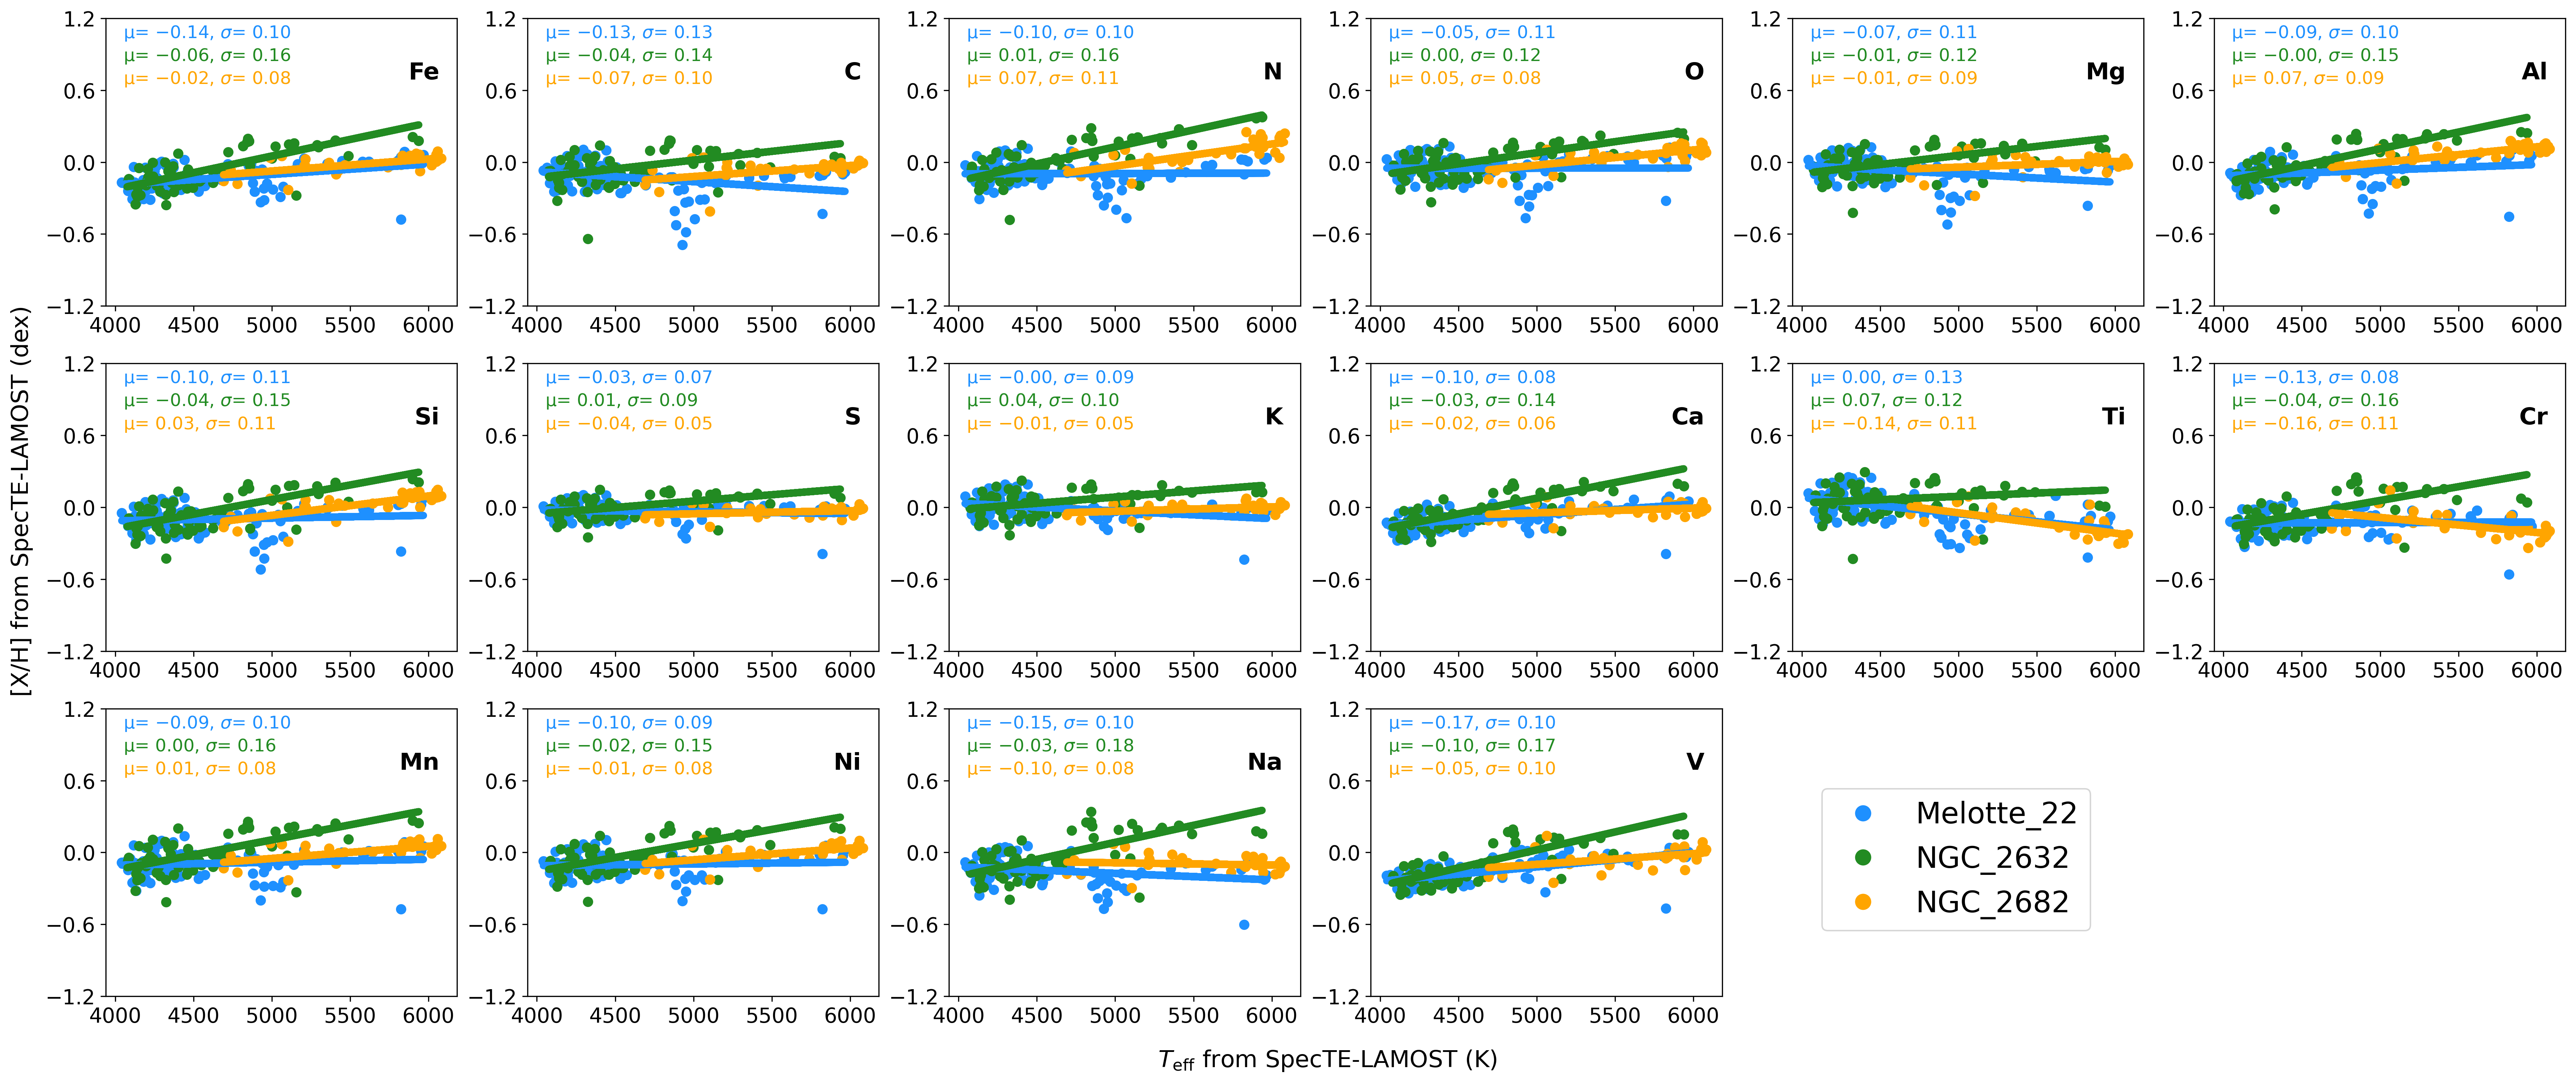

In [50]:
fig = plt.figure(figsize=(30,12),dpi=300)

colors= ['dodgerblue', 'forestgreen', 'orange', 'violet']
colors= ['dodgerblue', 'forestgreen', 'orange', 'violet', 'darkred', 'navy', 'gold']

for i in range(len(label_name_list)):
    ax = plt.subplot(3,6,i+1)
    
    for j in range(len(Teff)):
        # if j == 2 or j == 0:
            plt.scatter(Teff[j], Metallic_element[i][j], color=colors[j])
            # 计算线性回归
            # slope, intercept, r_value, p_value, std_err = linregress(Teff_all[j], Metallic_element_all[i][j])
            slope, intercept, r_value, p_value, std_err = linregress(Teff[j], Metallic_element[i][j])
            # 绘制回归线
            plt.plot(Teff[j], intercept + slope*Teff[j], linewidth=5, color=colors[j])

            plt.text(0.05, 0.98 - j * 0.08, 
                    f"μ= {Metallic_element_mean[i][j]:.{2}f}, $\sigma$= {Metallic_element_std[i][j]:.{2}f}".replace('-', '\u2212'), 
                    transform=ax.transAxes, fontsize=12, ha='left', va='top', color=colors[j])

    plt.xticks(size=14)
    plt.yticks(np.arange(-1.2, 1.25, 0.6), size=14)
    plt.text(0.95, 0.85, label_name_list[i].split('H')[0], transform=ax.transAxes,
            fontsize=16, ha='right', va='top', color='black', fontweight='bold')


# 添加图例，并控制其位置和大小
# 自定义图例
custom_lines = [Line2D([0], [0], color=colors[0], marker='o', markersize=10, linestyle=''),
                Line2D([0], [0], color=colors[1], marker='o', markersize=10, linestyle=''),
                Line2D([0], [0], color=colors[2], marker='o', markersize=10, linestyle='')]
fig.legend(custom_lines, star_cluster_name, loc='lower right', fontsize=20, bbox_to_anchor=(0.755, 0.15))

fig.supxlabel(r"$T_\mathrm{eff}$ from SpecTE-LAMOST (K)", size=16, position=(0.51, 0.05, 1))
fig.supylabel("[X/H] from SpecTE-LAMOST (dex)", size=16, position=(0.095, 0.5, 1))

plt.savefig('./images/Open_Clusters_teff1.png', bbox_inches='tight')
# plt.savefig('../images/Open_Clusters_teff_test.png', bbox_inches='tight')
# plt.tight_layout()
plt.show()


## 2. 在 Melotte 22, NGC 2168, NGC 2632 三个疏散星团中 LAMOST-SpecTAE 与 StarGRUNet 星表在化学丰度上的对比

In [8]:
# SpecTAE_Melotte_22_catalog = pd.read_csv("./match_result_JingZhong/Our_And_Melotte_22_new.csv")
# SpecTAE_NGC_2168_catalog = pd.read_csv("./match_result_JingZhong/Our_And_NGC_2168_new.csv")
# SpecTAE_NGC_2632_catalog = pd.read_csv("./match_result_JingZhong/Our_And_NGC_2632_new.csv")
SpecTAE_Melotte_22_catalog = pd.read_csv("./match_result_JingZhong/Our_StarGRUNet_all_And_Melotte_22_best_Our.csv")
SpecTAE_NGC_2168_catalog = pd.read_csv("./match_result_JingZhong/Our_StarGRUNet_all_And_NGC_2168_best_Our.csv")
SpecTAE_NGC_2632_catalog = pd.read_csv("./match_result_JingZhong/Our_StarGRUNet_all_And_NGC_2632_best_Our.csv")

StarGRUNet_Melotte_22_catalog = pd.read_csv("./match_result_JingZhong/StarGRUNet_And_Melotte_22_new.csv")
StarGRUNet_NGC_2168_catalog = pd.read_csv("./match_result_JingZhong/StarGRUNet_And_NGC_2168_new.csv")
StarGRUNet_NGC_2632_catalog = pd.read_csv("./match_result_JingZhong/StarGRUNet_And_NGC_2632_new.csv")

In [9]:
label_name_list = ['FeH_2', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH',
                  'SH', 'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH']
label_name_list_1 = ['FeH', 'CH', 'NH', 'OH', 'MgH', 'AlH', 'SiH',
                  'SH', 'KH', 'CaH', 'TiH', 'CrH', 'MnH', 'NiH']
star_cluster_name = ['Melotte_22', 'NGC_2168', 'NGC_2632']

data_SpecTAE = [SpecTAE_Melotte_22_catalog, SpecTAE_NGC_2168_catalog, SpecTAE_NGC_2632_catalog]
data_StarGRUNet = [StarGRUNet_Melotte_22_catalog, StarGRUNet_NGC_2168_catalog, StarGRUNet_NGC_2632_catalog]

SpecTAE_Metallic_element_std = []
StarGRUNet_Metallic_element_std = []
for index in range(len(data_SpecTAE)):
    # SpecTAE_Metallic_element_std.append([data_SpecTAE[index][ele].std() for ele in label_name_list])

    # if index == 0:
    #     SpecTAE_Metallic_element_std.append([data_SpecTAE[index][ele + "_1"].std() for ele in label_name_list_1])
    # else:
    #     SpecTAE_Metallic_element_std.append([data_SpecTAE[index][ele].std() for ele in label_name_list])

    SpecTAE_Metallic_element_std.append([data_SpecTAE[index][ele + "_1"].std() for ele in label_name_list_1])
    StarGRUNet_Metallic_element_std.append([data_StarGRUNet[index][ele].std() for ele in label_name_list])


len(SpecTAE_Metallic_element_std[0])

14

In [10]:
for index in range(len(SpecTAE_Metallic_element_std)):
    max_value = max(SpecTAE_Metallic_element_std[index])
    min_value = min(SpecTAE_Metallic_element_std[index])
    average_value = sum(SpecTAE_Metallic_element_std[index]) / len(SpecTAE_Metallic_element_std[index])
    
    gap = (max_value - min_value) / 2
    # print("最大值:", max_value)
    # print("最小值:", min_value)
    # print("平均值:", average_value, "\n")

    print(f'在 {star_cluster_name[index]} 中的整体化学均匀性为：{average_value:.3f} ± {gap:.3f}dex')

在 Melotte_22 中的整体化学均匀性为：0.135 ± 0.033dex
在 NGC_2168 中的整体化学均匀性为：0.215 ± 0.075dex
在 NGC_2632 中的整体化学均匀性为：0.113 ± 0.026dex


In [79]:
for index in range(len(SpecTAE_Metallic_element_std)):
    max_value = max(SpecTAE_Metallic_element_std[index])
    min_value = min(SpecTAE_Metallic_element_std[index])
    average_value = sum(SpecTAE_Metallic_element_std[index]) / len(SpecTAE_Metallic_element_std[index])
    
    gap = (max_value - min_value) / 2
    # print("最大值:", max_value)
    # print("最小值:", min_value)
    # print("平均值:", average_value, "\n")

    print(f'在 {star_cluster_name[index]} 中的整体化学均匀性为：{average_value:.3f} ± {gap:.3f}dex')

在 Melotte_22 中的整体化学均匀性为：0.135 ± 0.033dex
在 NGC_2168 中的整体化学均匀性为：0.215 ± 0.075dex
在 NGC_2632 中的整体化学均匀性为：0.113 ± 0.026dex


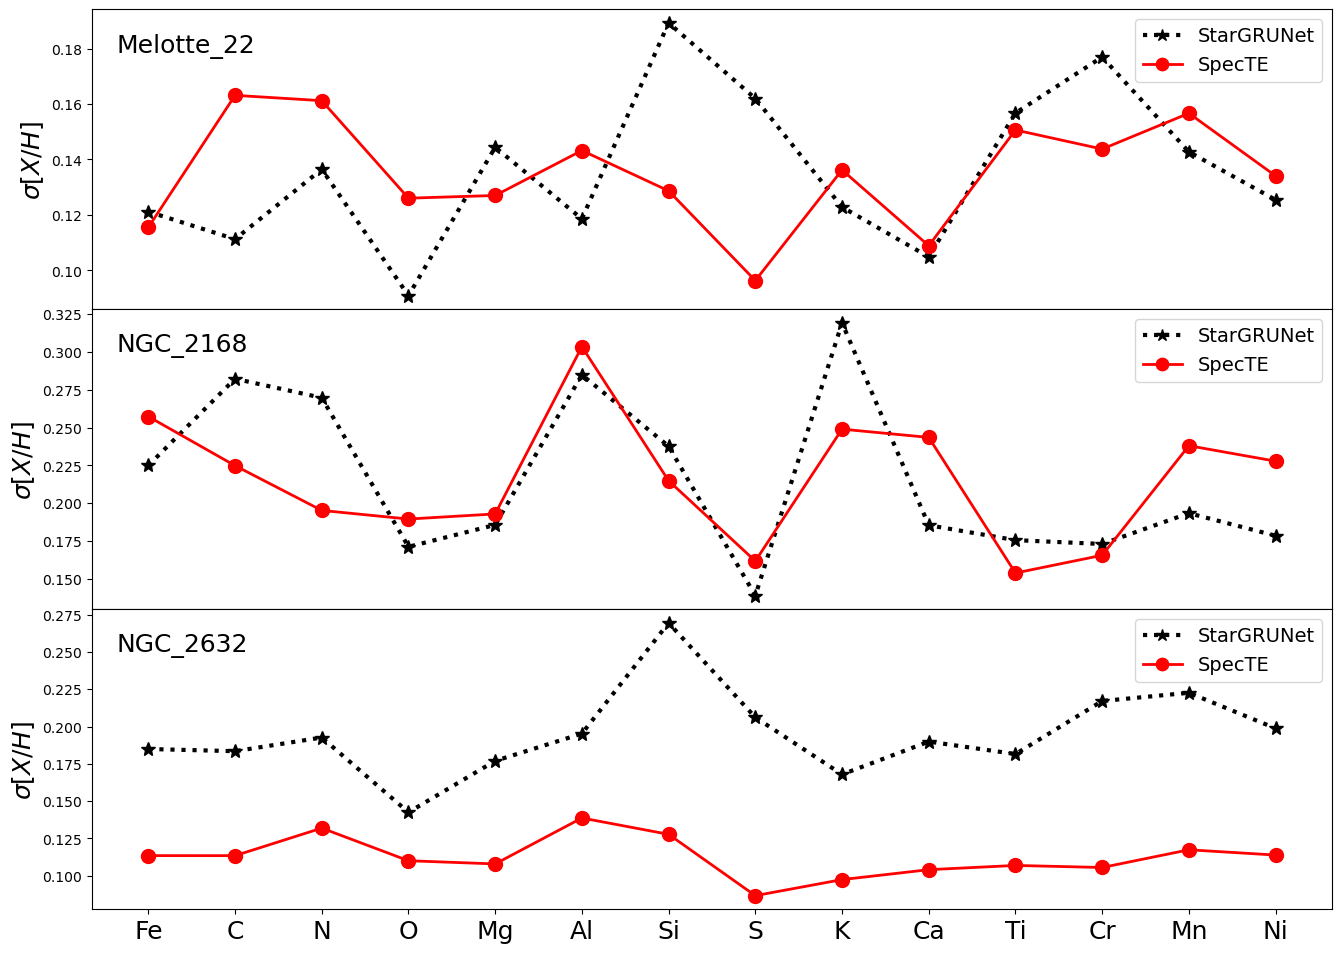

In [11]:
# 创建一个新的图形对象，并设置大小
fig, axs = plt.subplots(3, 1, figsize=(16, 10), sharex=True, gridspec_kw={'hspace': 0})

x_name = [ele.split("H")[0] for ele in label_name_list]

# 循环绘制三个子图
for i in range(3):
    axs[i].plot(x_name, StarGRUNet_Metallic_element_std[i], label="StarGRUNet", color="black", 
                linestyle=':', linewidth=3, marker='*', markersize=10)
    axs[i].plot(x_name, SpecTAE_Metallic_element_std[i], label="SpecTE", color="red", 
                linewidth=2, marker='o', markersize=10)

    axs[i].set_ylabel(r"$\sigma[X/H]$", fontsize=18)
    axs[i].tick_params(axis='x', labelsize=18)  # 设置 x 轴刻度标签的字体大小
    axs[i].text(0.02, 0.92, star_cluster_name[i], transform=axs[i].transAxes, verticalalignment='top', fontsize=18)

    # 设置图例
    handles, labels = axs[i].get_legend_handles_labels()
    axs[i].legend(handles=[handles[0], handles[1]], labels=["StarGRUNet", "SpecTE"], loc='upper right', 
                  markerscale=0.89, fontsize=14)

    # axs[i].grid(True)

# 单独设置最下面一幅图的 x 轴标签
# axs[2].set_xlabel('x')

# 调整子图之间的间距和位置
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.05)

plt.savefig('../images/tests_of_open_star_clusters_2_10.png', bbox_inches='tight')
plt.savefig('../images/tests_of_open_star_clusters_2_10.pdf', bbox_inches='tight')

# 显示图形
plt.show()